In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.population_model as pop
import lbg_forecast.noise as noise
import lbg_forecast.selection as sel
import lbg_forecast.nz_sim as nz
import lbg_forecast.lyalpha as ly
import os
from getdist import plots, MCSamples

In [2]:
def numpy_to_mcsamples(array, names, label):
    "convenience function used for plotting using getdist"
    samples = np.copy(array)
    samples[:, -1] = np.log10(samples[:, -1])
    samples[:, 8] = np.log10(samples[:, 8])
    return MCSamples(samples=samples, names=names, label=label)

def plot_samples(all, u, g, r):
    "plot triangle plot for sps parameters"
    plotter = plots.get_subplot_plotter()
    names = pop.sps_parameter_names()#["zred", "logzsol", "dust1", "dust2", "dust_index", 
            #          "igm_factor", "gas_logu", "logfagn", "agn_tau",
            #           "logf1", "logf2", "logf3", "logf4", "logf5","logf6", "logmass"]
    
    s1 = numpy_to_mcsamples(all, names, label = "global population")
    s2 = numpy_to_mcsamples(u, names, label = "u-dropouts")
    s3 = numpy_to_mcsamples(g, names, label = "g-dropouts")
    s4 = numpy_to_mcsamples(r, names, label = "r-dropouts")
    
    plotter.triangle_plot([s1, s2, s3, s4], Filled=False, contour_lws=2, colors=["black", "blue", "red", "green"], contour_colors=["black", "blue", "red", "green"])

In [3]:
#counts how many individual files of a given type there are (i.e. number of simulation runs)
files = os.listdir("simulation_data")
run_count = 0
for file in files:
    if("sps_parameters" in file):
        run_count+=1
print(run_count)

#loads files
sps_parameters = []
photometry = []
spectra = []
for run in range(run_count):
    sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(run)+".npy"))
    photometry.append(np.load("simulation_data/simulated_photometry_"+str(run)+".npy"))
    spectra.append(np.load("simulation_data/spectra_"+str(run)+".npy"))
sps_parameters = np.vstack(sps_parameters)
photometry = np.vstack(photometry)
spectra = np.vstack(spectra)
wavelengths = np.load("simulation_data/wavelengths_0.npy")

17


In [4]:
photometry.shape

(50034, 6)

In [5]:
sources = noise.get_noisy_magnitudes(sps_parameters, photometry, random_state=42)
colours = sel.colours(sources)
uparams, gparams, rparams = nz.apply_cuts(colours, return_all_params=True)
uparams.shape

(333, 17)

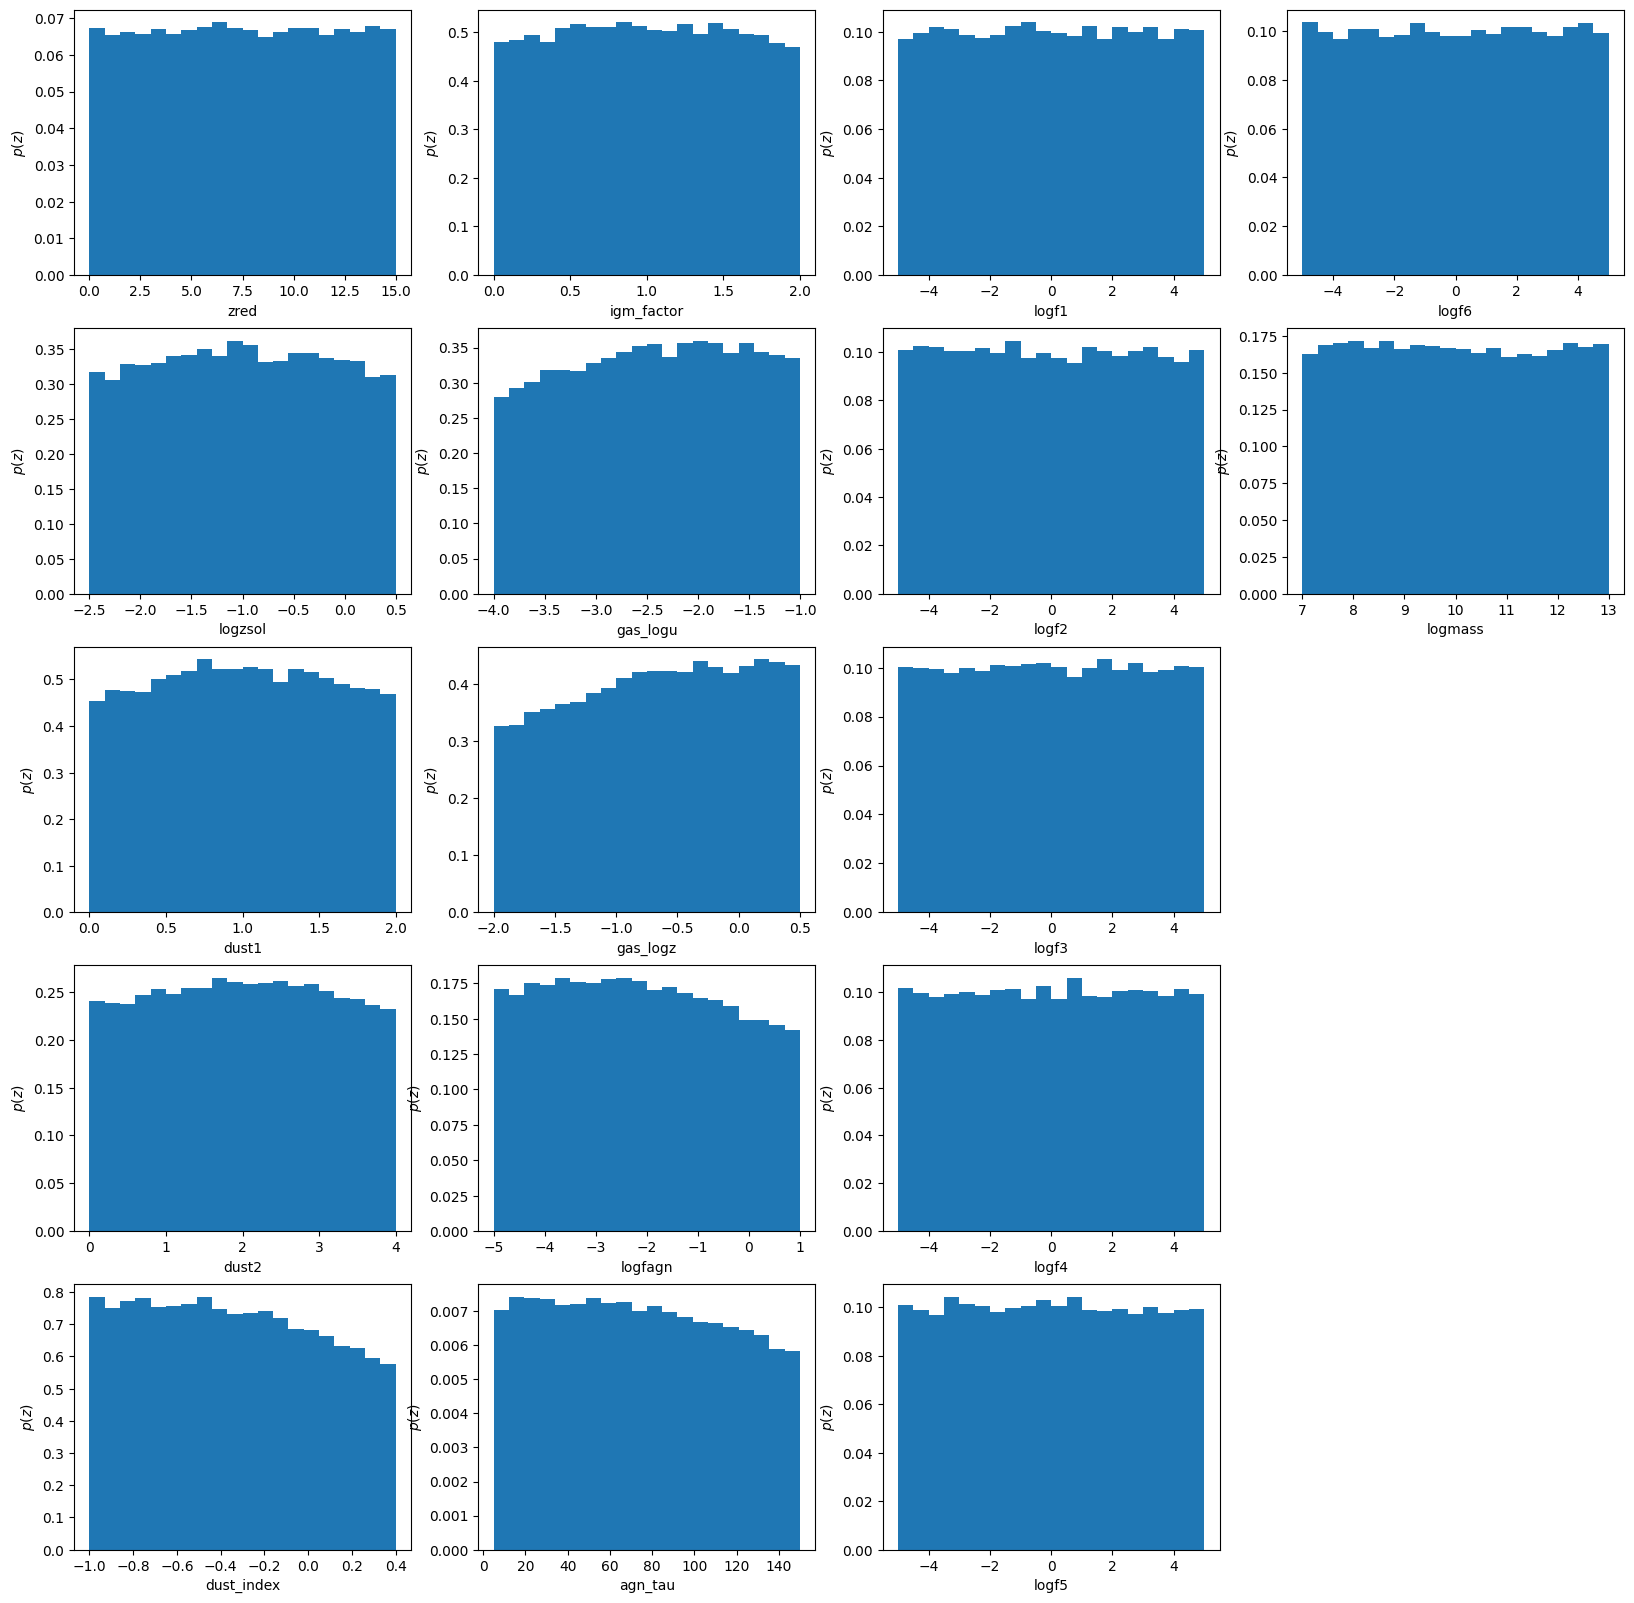

In [6]:
pop.plot_galaxy_population(sps_parameters)

(array([0.09934177, 0.        , 0.02483544, 0.        , 0.        ,
        0.        , 0.        , 0.02483544, 0.        , 0.09934177,
        0.07450633, 0.02483544, 0.        , 0.        , 0.04967089,
        0.02483544, 0.07450633, 0.24835443, 0.62088608, 1.19210127,
        0.76989874, 0.62088608, 0.32286076, 0.14901266, 0.14901266,
        0.04967089, 0.04967089, 0.09934177, 0.1738481 , 0.14901266,
        0.1738481 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02483544]),
 array([ 0.82809221,  1.01712993,  1.20616766,  1.39520538,  1.58424311,
         1.77328083,  1.96231856,  2.15135628,  2.34039401,  2.52943173,
         2.71846946,  2.90750718,  3.09654491,  3.28558263,  3.47462036,
         3.66365809,  3.85269581,  4.04173354,  4.23077126,  4.41980899,
         4.60884671,  4.79

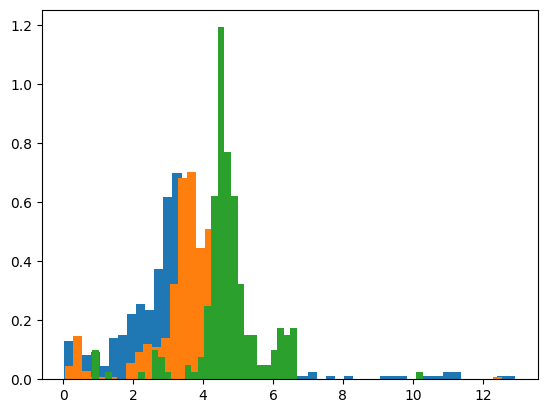

In [7]:
bins = 50
plt.hist(uparams[:, 0], bins=bins, density=True)
plt.hist(gparams[:, 0], bins=bins, density=True)
plt.hist(rparams[:, 0], bins=bins, density=True)

In [8]:
#plot_samples(sps_parameters, uparams, gparams, rparams)